In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,classification_report,roc_curve,auc,roc_auc_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [27]:
df = pd.read_csv('diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
351,4,137,84,0,0,31.2,0.252,30,0
373,2,105,58,40,94,34.9,0.225,25,0
362,5,103,108,37,0,39.2,0.305,65,0
608,0,152,82,39,272,41.5,0.270,27,0
530,2,122,60,18,106,29.8,0.717,22,0


In [28]:
df.shape

(768, 9)

In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Q3: Are there differences in feature distributions (e.g., Glucose, BloodPressure) between diabetic and non-diabetic patients? Use violin plots or boxplots to compare these groups.

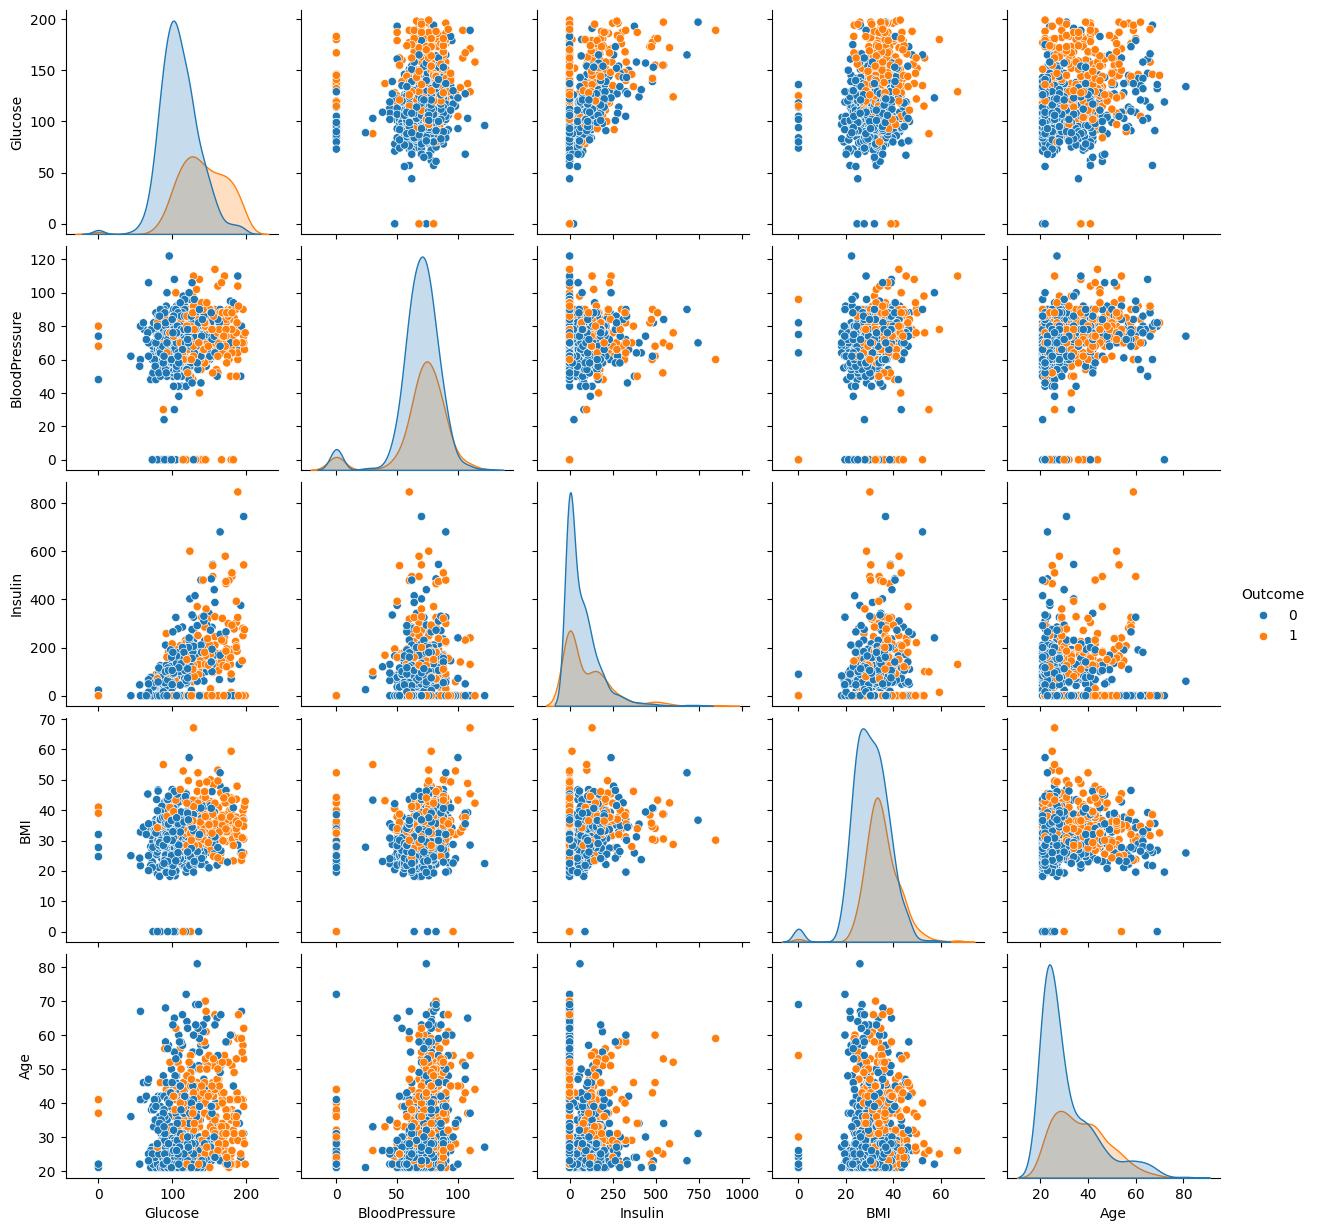

In [30]:
sns.pairplot(df, vars=['Glucose','BloodPressure','Insulin','BMI','Age'],diag_kind='kde',hue='Outcome')
plt.savefig('data_graph_distribution.png')

Visualize correlation heatmaps. Which 3 features correlate most strongly with diabetes outcome?

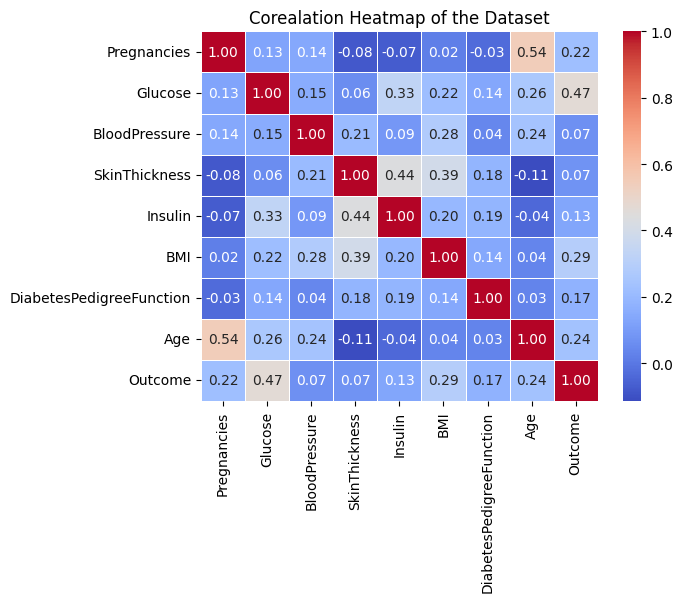

In [31]:
# Calculate the co-relation matrix
co_relation_matrix = df.corr()

plt.Figure(figsize=(8,6))
sns.heatmap(co_relation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5)
plt.title("Corealation Heatmap of the Dataset")
plt.savefig('co-relation_matrics.png')
plt.show()

Are there differences in feature distributions (e.g., Glucose, BloodPressure) between diabetic and non-diabetic patients? Use violin plots or boxplots to compare these groups.

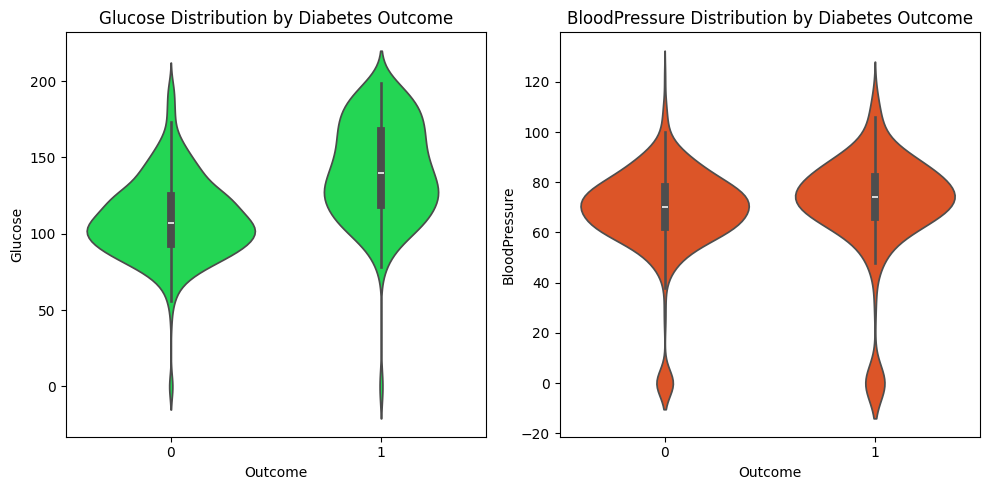

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='Outcome', y='Glucose', data=df,color='#07f246')
plt.title('Glucose Distribution by Diabetes Outcome')
plt.subplot(1, 2, 2)
sns.violinplot(x='Outcome', y='BloodPressure', data=df , color='#fa460a')
plt.title('BloodPressure Distribution by Diabetes Outcome')
plt.tight_layout()
plt.show()

Q4: Perform statistical tests (e.g., t-tests or Mann-Whitney U tests) to determine if features like Glucose or BMI differ significantly between diabetic and non-diabetic groups.

In [33]:
# for this we have to use Scipy Stats
diabetic_group = df[df['Outcome'] == 1]
non_diabetic_group = df[df['Outcome'] == 0]

from scipy import stats

t_stats_for_glucose , p_value_glucose = stats.ttest_ind(diabetic_group['Glucose'],non_diabetic_group['Glucose'])
print(f"Glucose T-stats value: {t_stats_for_glucose}")
print(f"P-value for Glucose: {p_value_glucose}")
if p_value_glucose < 0.05:
    print("Glucose differs significantly between diabetic and non-diabetic groups")
print("-"*50)

t_stats_for_bmi , p_value_bmi = stats.ttest_ind(diabetic_group['BMI'],non_diabetic_group['BMI'])
print(f"BMI T-stats value: {t_stats_for_bmi}")
print(f"P-value for BMI: {p_value_bmi}")
if p_value_bmi < 0.05:
    print("BMI differs significantly between diabetic and non-diabetic groups")
print("-"*50)
 
t_stats_for_bp , p_value_bp = stats.ttest_ind(diabetic_group['BloodPressure'],non_diabetic_group['BloodPressure'])
print(f"Blood Pressure T-stats value: {t_stats_for_bp}")
print(f"P-value for BMI: {p_value_bp}")
if p_value_bp < 0.05:
    print("BLood Pressure differs significantly between diabetic and non-diabetic groups")
print("-"*50)


Glucose T-stats value: 14.600060005973894
P-value for Glucose: 8.935431645289912e-43
Glucose differs significantly between diabetic and non-diabetic groups
--------------------------------------------------
BMI T-stats value: 8.47183994786525
P-value for BMI: 1.2298074873116022e-16
BMI differs significantly between diabetic and non-diabetic groups
--------------------------------------------------
Blood Pressure T-stats value: 1.8047023017353887
P-value for BMI: 0.07151390009776082
--------------------------------------------------


3. Model Application


In [34]:
print((df[['Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']] == 0).sum())

Glucose            5
BMI               11
BloodPressure     35
SkinThickness    227
Insulin          374
dtype: int64


In [35]:
features_to_impute = ['Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']
df[features_to_impute] = df[features_to_impute].replace(0, np.nan) # replace zeroes with NAN
# Impute with mean (or use KNNImputer)
df[features_to_impute] = df[features_to_impute].fillna(df[features_to_impute].mean())

In [36]:
print((df[['Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']] == 0).sum())

Glucose          0
BMI              0
BloodPressure    0
SkinThickness    0
Insulin          0
dtype: int64


In [37]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [38]:
# Lets Scaled the Parameters using StanderdScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

 * Q8: Train a Logistic Regression model to predict diabetes. How does the model perform in terms of accuracy, precision, recall, and F1-score? Plot the ROC curve and calculate the AUC.

In [39]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print("-"*50)
print("Confusion Metrics:" )
CM = confusion_matrix(y_test,y_pred)
print(pd.DataFrame(CM, columns=['Non-Diabetic(0)','Diabetic(1)'],index=['Non-Diabetic(0)','Diabetic(1)']))
print("-"*50)
print(f"Precision Score: {precision_score(y_test,y_pred,average='binary')}")
print(f"Recall_Score: {recall_score(y_test,y_pred)}")
print(f"F1 Score: {f1_score(y_test,y_pred)}")

Accuracy Score: 0.7532467532467533


--------------------------------------------------
Confusion Metrics:
                 Non-Diabetic(0)  Diabetic(1)
Non-Diabetic(0)               82           17
Diabetic(1)                   21           34
--------------------------------------------------
Precision Score: 0.6666666666666666
Recall_Score: 0.6181818181818182
F1 Score: 0.6415094339622641


In [40]:
result = pd.DataFrame()
result['Actual'] = y_test
result['Logistic_Reg-predicted'] = y_pred
result.sample(5)

,Actual,Logistic_Reg-predicted
375,1,1
548,0,1
431,0,0
428,0,0
468,1,0


In [41]:
y_pred_logistic = lr.predict_proba(X_test_scaled)[:,1] # <- We have to take the probabilistic value
print(y_pred_logistic[1])
# check if both contains 0 or 1
print(y_train.value_counts())
print(y_test.value_counts())

0.16393638272360406
Outcome
0    401
1    213
Name: count, dtype: int64
Outcome
0    99
1    55
Name: count, dtype: int64


**ROC Curve :** It plots TPR vs. FPR at different thresholds. It represents the trade-off between the sensitivity and specificity of a classifier.

**AUC(Area Under the Curve):** measures the area under the ROC curve. A higher AUC value indicates better model performance as it suggests a greater ability to distinguish between classes. An AUC value of 1.0 indicates perfect performance while 0.5 suggests it is random guessing.

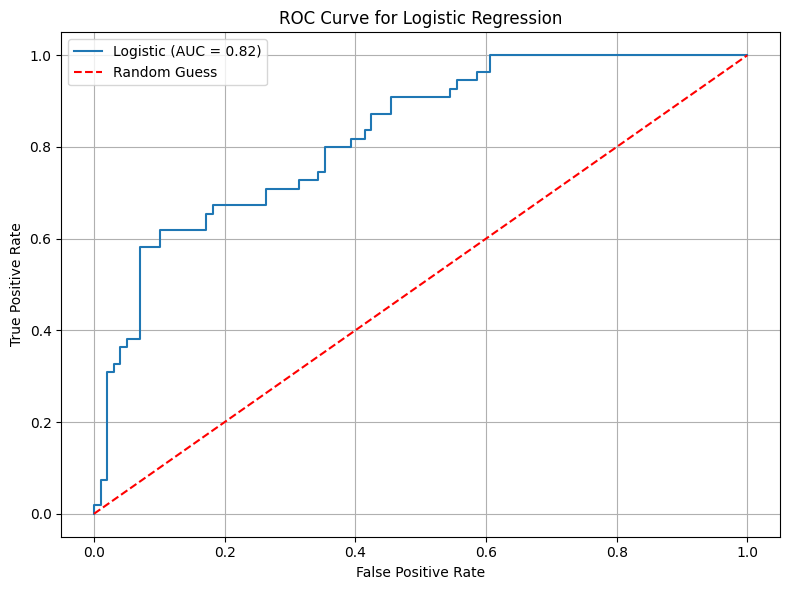

AUC for Logistic Regression: 0.82


In [42]:
from sklearn.metrics import roc_curve, auc

new_df_for_roc = pd.DataFrame({'True': y_test, 'Logistic': y_pred_logistic})
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(new_df_for_roc['True'], new_df_for_roc['Logistic'])
roc_auc = auc(fpr, tpr)  # Uses auc function
plt.plot(fpr, tpr, label=f'Logistic (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()
print(f"AUC for Logistic Regression: {roc_auc:.2f}")

Q9: Apply Ridge and Lasso regularization to the Logistic Regression model. Compare their coefficients to understand which features are most important and how regularization affects them.

In [43]:
"""
rg = Ridge(alpha=1)
rg.fit(X_train_Scaled,y_train)
y_pred_ridge = rg.predict(X_test_scaled)
lr  = Lasso(alpha=0.01)
lr.fit(X_train_Scaled,y_train)
y_pred_lasso = lr.predict(X_test_scaled)
print(f"Ridge co-eff: {rg.coef_} \nvs \nLasso co-eff: {lr.coef_}") """

"""
Issue: You’re using Ridge and Lasso from sklearn.linear_model, which are linear regression models for continuous outcomes.
The Diabetes dataset’s Outcome is binary, so you need Logistic Regression with Ridge (L2) and Lasso (L1) regularization, 
implemented via LogisticRegression(penalty='l2') for Ridge and LogisticRegression(penalty='l1') for Lasso.
"""

ridge_reg = LogisticRegression(penalty='l2', C=1.0 , solver= 'lbfgs',max_iter=1000)
lasso_reg = LogisticRegression(penalty='l1',C=0.1, solver='liblinear',max_iter=1000)

ridge_reg.fit(X_train_scaled,y_train)
lasso_reg.fit(X_train_scaled,y_train)

y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

print(f"RIDGE : Accuracy Score: {accuracy_score(y_test,y_pred_ridge):.4f}")
print(f"LASSO : Accuracy Score: {accuracy_score(y_test,y_pred_lasso):.4f}")

ridge_vs_lasso_coeff = pd.DataFrame({'Feature': X.columns,
                               "Ridge": ridge_reg.coef_[0],
                               "Lasso": lasso_reg.coef_[0]})
print(ridge_vs_lasso_coeff)

RIDGE : Accuracy Score: 0.7532
LASSO : Accuracy Score: 0.7597
                    Feature     Ridge     Lasso
0               Pregnancies  0.224953  0.146340
1                   Glucose  1.083654  0.913197
2             BloodPressure -0.145489  0.000000
3             SkinThickness  0.068611  0.000265
4                   Insulin -0.096974  0.000000
5                       BMI  0.679456  0.529155
6  DiabetesPedigreeFunction  0.199995  0.099992
7                       Age  0.394776  0.283100


Q10: Using your Logistic Regression model from Q8, create a bar plot of the absolute coefficients to visualize feature importance. Sort the features by importance and identify the top three predictors of diabetes

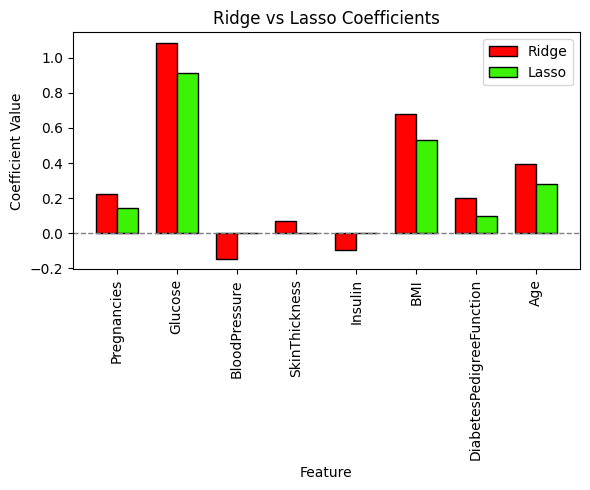

Top 3 Predictors of Diabetes : 
    Feature     Ridge     Lasso
1  Glucose  1.083654  0.913197
5      BMI  0.679456  0.529155
7      Age  0.394776  0.283100


In [44]:
# Set the positions of the bars on the x-axis
bar_width = 0.35
index = np.arange(len(ridge_vs_lasso_coeff))

# plot the bar
plt.figure(figsize=(6,5))
plt.bar(index, ridge_vs_lasso_coeff['Ridge'], width=bar_width, label='Ridge',color='#ff0303', edgecolor='black')
plt.bar(index+bar_width, ridge_vs_lasso_coeff['Lasso'], bar_width,label='Lasso',color='#3cf205', edgecolor = 'black')

plt.axhline(0, color='gray', linewidth=1, linestyle='--') # <-- add a line through 0.0

plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Ridge vs Lasso Coefficients')
plt.xticks(index + bar_width / 2, ridge_vs_lasso_coeff['Feature'], rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('ridge_lasso_coefs.png')
plt.show()

sorted_df = ridge_vs_lasso_coeff.sort_values(by='Lasso',ascending=False)
sorted_df = sorted_df.head(3)
print("Top 3 Predictors of Diabetes : \n",sorted_df)

Q11: Train Logistic Regression models with L2 regularization (Ridge) using different C values (e.g., 0.01, 0.1, 1, 10, 100). Plot accuracy and AUC versus C on the test set. How does stronger regularization (lower C) affect performance and coefficients? Explain the trade-off.

--------------------------------------------------
---C=0.001--- 
Accuracy Score: 0.6494 
AUC=0.8160
--------------------------------------------------
---C=0.01--- 
Accuracy Score: 0.7597 
AUC=0.8235
--------------------------------------------------
---C=0.1--- 
Accuracy Score: 0.7662 
AUC=0.8228
--------------------------------------------------
---C=1--- 
Accuracy Score: 0.7532 
AUC=0.8242
--------------------------------------------------
---C=10--- 
Accuracy Score: 0.7532 
AUC=0.8237
--------------------------------------------------
---C=100--- 
Accuracy Score: 0.7532 
AUC=0.8237


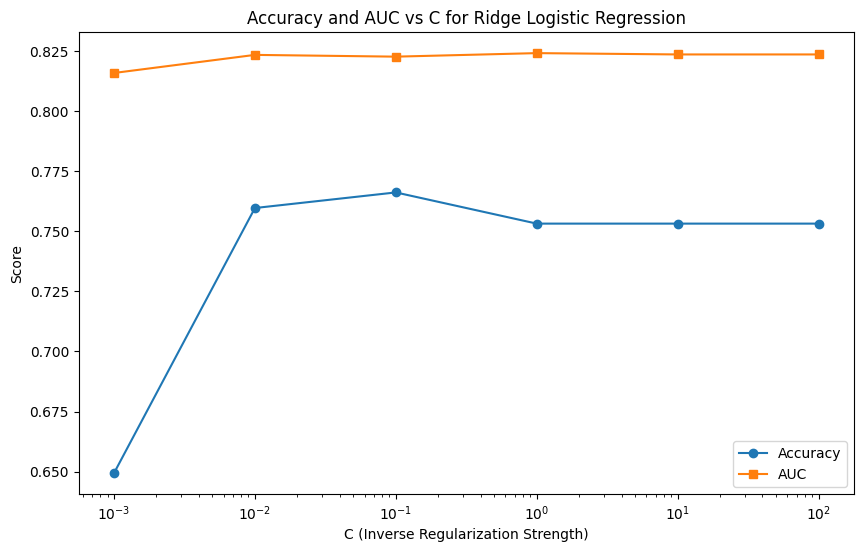

In [45]:
"""
In logistic regression, the C parameter controls the strength of regularization. It's the inverse of the regularization strength, and smaller values 
indicate stronger regularization, which helps prevent overfitting. Conversely, larger values indicate weaker regularization, allowing the model to 
potentially overfit to the training data. 
"""

C_values = [0.001,0.01,0.1,1,10,100]
accuracies = []
auc_scores = []
    
for c in C_values:
    ridge_reg_comp = LogisticRegression(penalty='l2', C=c , solver= 'lbfgs',max_iter=1000)
    ridge_reg_comp.fit(X_train_scaled,y_train)
    y_pred_ridge_comp = ridge_reg_comp.predict(X_test_scaled)
    
    print("-"*50)
    
    # Predictions and probabilities
    y_pred_ridge_comp = ridge_reg_comp.predict(X_test_scaled)
    y_pred_proba = ridge_reg_comp.predict_proba(X_test_scaled)[:, 1]
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred_ridge_comp)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    accuracies.append(acc)
    auc_scores.append(auc)
    
    print(f"---C={c}--- \nAccuracy Score: {acc:.4f} \nAUC={auc:.4f}")

# Plot accuracy and AUC vs C
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, label='Accuracy', marker='o')
plt.plot(C_values, auc_scores, label='AUC', marker='s')
plt.xscale('log')  # Log scale for C values
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Score')
plt.title('Accuracy and AUC vs C for Ridge Logistic Regression')
plt.legend()
plt.savefig('accuracy_auc_vs_C.png')  # Save for GitHub
plt.show()
    
    

FINAL RESULT

TAKING USER INPUT AND SHOWING RESULT IF THE PERSON HAVE DIABETES OR NOT!

The model’s **predict_proba** method and **scale.transform** expect input **as a 2D NumPy array with shape (n_samples, n_features)**

**lr.predict_proba** returns a **2D NumPy array** with shape **(n_samples, n_classes)**. Here:\
n_samples = 1 (one user input).\
n_classes = 2 (classes 0: non-diabetic, 1: diabetic).

**np.array([[...]])** ensures compatibility, as a list or Pandas Series would raise a ValueError. **The double brackets [[...]]** create a **2D array with one row.**

For Age: 47.05% probability of diabetes
For Glucose: 80.19% probability of diabetes
For BloodPressure: 10.78% probability of diabetes
Overall chances of being diabetic: 71.52%


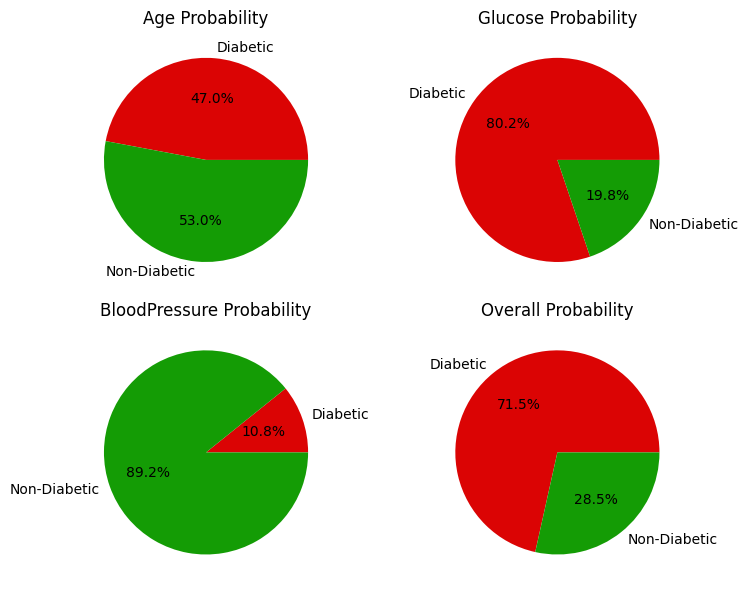

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume lr, scale, X_train are defined from your Q8/Q6
feature_means = X_train.mean()
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Input validation
while True:
    try:
        age = float(input("Enter Your Age [0-100]: "))
        if not 0 <= age <= 100:
            raise ValueError("Age must be between 0 and 100")
        glucose = float(input("Enter Your Glucose [50-300]: "))
        if not 50 <= glucose <= 300:
            raise ValueError("Glucose must be between 50 and 300")
        blood_pressure = float(input("Enter Your BloodPressure [50-200]: "))
        if not 50 <= blood_pressure <= 200:
            raise ValueError("BloodPressure must be between 50 and 200")
        break
    except ValueError as e:
        print(f"Invalid input: {e}. Try again.")

# Create input vector
input_data = np.array([[feature_means['Pregnancies'], glucose, blood_pressure, feature_means['SkinThickness'], 
                        feature_means['Insulin'], feature_means['BMI'], feature_means['DiabetesPedigreeFunction'], age]])

# Scale input
input_scaled = scale.transform(input_data)

# Overall probability
overall_prob = lr.predict_proba(input_scaled)[0, 1] * 100

# Individual probabilities
input_age = input_data.copy()
input_age[:, features.index('Glucose')] = feature_means['Glucose']
input_age[:, features.index('BloodPressure')] = feature_means['BloodPressure']
age_prob = lr.predict_proba(scale.transform(input_age))[0, 1] * 100

input_glucose = input_data.copy()
input_glucose[:, features.index('Age')] = feature_means['Age']
input_glucose[:, features.index('BloodPressure')] = feature_means['BloodPressure']
glucose_prob = lr.predict_proba(scale.transform(input_glucose))[0, 1] * 100

input_bp = input_data.copy()
input_bp[:, features.index('Age')] = feature_means['Age']
input_bp[:, features.index('Glucose')] = feature_means['Glucose']
bp_prob = lr.predict_proba(scale.transform(input_bp))[0, 1] * 100

# Print probabilities
print(f"For Age: {age_prob:.2f}% probability of diabetes")
print(f"For Glucose: {glucose_prob:.2f}% probability of diabetes")
print(f"For BloodPressure: {bp_prob:.2f}% probability of diabetes")
print(f"Overall chances of being diabetic: {overall_prob:.2f}%")

# Pie charts
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
labels = ['Diabetic', 'Non-Diabetic']

axs[0, 0].pie([age_prob, 100 - age_prob], labels=labels, autopct='%1.1f%%', colors=['#db0404', '#149c05'])
axs[0, 0].set_title('Age Probability')

axs[0, 1].pie([glucose_prob, 100 - glucose_prob], labels=labels, autopct='%1.1f%%', colors=['#db0404', '#149c05'])
axs[0, 1].set_title('Glucose Probability')

axs[1, 0].pie([bp_prob, 100 - bp_prob], labels=labels, autopct='%1.1f%%', colors=['#db0404', '#149c05'])
axs[1, 0].set_title('BloodPressure Probability')

axs[1, 1].pie([overall_prob, 100 - overall_prob], labels=labels, autopct='%1.1f%%', colors=['#db0404', '#149c05'])
axs[1, 1].set_title('Overall Probability')

plt.tight_layout()
plt.savefig('diabetes_prob_pie_charts.png')
plt.show()

import warnings
warnings.filterwarnings('ignore')

IMPORT STREAMLIT,JOBLIB,

In [47]:
import joblib
joblib.dump(lr, 'logistic_model.pkl')
joblib.dump(scale, 'scaler.pkl')
joblib.dump(feature_means, 'feature_means.pkl')

['feature_means.pkl']